# 서울시의 인구와 CCTV 비율의 상관관계 파악하기

### 라이브러리 불러오기

In [1]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import font_manager, rc
%matplotlib inline

plt.rcParams['axes.unicode_minus'] = False

rc('font', family='AppleGothic')

## 데이터 인출 및 정제하기

In [2]:
cctv_data = pd.read_csv('./seoul_cctv.csv', encoding='utf-8')
popularity = pd.read_excel('./seoul_popularity.xls', header=2, usecols='B, D, G, J, N', encoding='utf-8')

In [3]:
cctv_data.head()

,기관명,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,2780,1292,430,584,932
1,강동구,773,379,99,155,377
2,강북구,748,369,120,138,204
3,강서구,884,388,258,184,81
4,관악구,1496,846,260,390,613


In [4]:
popularity.head()

,자치구,계,계.1,계.2,65세이상고령자
0,합계,10197604.0,9926968.0,270636.0,1321458.0
1,종로구,162820.0,153589.0,9231.0,25425.0
2,중구,133240.0,124312.0,8928.0,20764.0
3,용산구,244203.0,229456.0,14747.0,36231.0
4,성동구,311244.0,303380.0,7864.0,39997.0


In [5]:
cctv_data.rename(columns={ cctv_data.columns[0]: "구별" }, inplace=True)
cctv_data['최근증가율'] = cctv_data.apply(lambda row: \
                    (row['2014년'] + row['2015년'] + row['2016년']) / row['2013년도 이전'] * 100, axis=1)

cctv_data.drop(["2013년도 이전", "2014년", "2015년", "2016년"], axis=1, inplace=True)

cctv_data.head()

,구별,소계,최근증가율
0,강남구,2780,150.619195
1,강동구,773,166.490765
2,강북구,748,125.203252
3,강서구,884,134.793814
4,관악구,1496,149.290780


In [6]:
popularity.rename(columns= \
        { popularity.columns[0]: "구별", popularity.columns[1]: "인구수", popularity.columns[2]: "한국인", popularity.columns[3]: "외국인", popularity.columns[4]: "고령자" }, \
                  inplace=True)

popularity['외국인 비율'] = popularity.apply(lambda row: row['외국인'] / row['인구수'] * 100, axis=1)
popularity['고령자 비율'] = popularity.apply(lambda row: row['고령자'] / row['인구수'] * 100, axis=1)

popularity.drop([0], inplace=True)

popularity.dropna(inplace=True)

popularity.head()

,구별,인구수,한국인,외국인,고령자,외국인 비율,고령자 비율
1,종로구,162820.0,153589.0,9231.0,25425.0,5.669451,15.615404
2,중구,133240.0,124312.0,8928.0,20764.0,6.700690,15.583909
3,용산구,244203.0,229456.0,14747.0,36231.0,6.038828,14.836427
4,성동구,311244.0,303380.0,7864.0,39997.0,2.526635,12.850689
5,광진구,372164.0,357211.0,14953.0,42214.0,4.017852,11.342849


In [7]:
result = pd.merge(cctv_data, popularity, on="구별")

result.set_index("구별", inplace=True)
result['CCTV 비율'] = result.apply(lambda row: row['소계'] / row['인구수'] * 100, axis=1)

result.head()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인 비율,고령자 비율,CCTV 비율
구별,,,,,,,,,
강남구,2780,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217,0.487292
강동구,773,166.490765,453233.0,449019.0,4214.0,54622.0,0.929765,12.051638,0.170552
강북구,748,125.203252,330192.0,326686.0,3506.0,54813.0,1.061806,16.600342,0.226535
강서구,884,134.793814,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794,0.146413
관악구,1496,149.290780,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291,0.284673


## 상관관계 파악하기

In [8]:
correlation = result.corr(method='pearson')
correlation

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인 비율,고령자 비율,CCTV 비율
소계,1.000000,-0.343016,0.306342,0.304287,-0.023786,0.255196,-0.136074,-0.280786,0.575784
최근증가율,-0.343016,1.000000,-0.093068,-0.082511,-0.150463,-0.070969,-0.044042,0.185089,-0.171143
인구수,0.306342,-0.093068,1.000000,0.998061,-0.153371,0.932667,-0.591939,-0.669462,-0.514143
한국인,0.304287,-0.082511,0.998061,1.000000,-0.214576,0.931636,-0.637911,-0.660812,-0.513169
외국인,-0.023786,-0.150463,-0.153371,-0.214576,1.000000,-0.155381,0.838904,-0.014055,0.079211
고령자,0.255196,-0.070969,0.932667,0.931636,-0.155381,1.000000,-0.606088,-0.380468,-0.541024
외국인 비율,-0.136074,-0.044042,-0.591939,-0.637911,0.838904,-0.606088,1.000000,0.267348,0.406199
고령자 비율,-0.280786,0.185089,-0.669462,-0.660812,-0.014055,-0.380468,0.267348,1.000000,0.290528
CCTV 비율,0.575784,-0.171143,-0.514143,-0.513169,0.079211,-0.541024,0.406199,0.290528,1.000000


In [9]:
sm_model = sm.OLS.from_formula("소계 ~ 인구수", result).fit()
sm_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     소계   R-squared:                       0.094
Model:                            OLS   Adj. R-squared:                  0.054
Method:                 Least Squares   F-statistic:                     2.382
Date:                Thu, 19 Mar 2020   Prob (F-statistic):              0.136
Time:                        20:55:25   Log-Likelihood:                -191.78
No. Observations:                  25   AIC:                             387.6
Df Residuals:                      23   BIC:                             390.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    645.0665    362.550      1.779      0.088    -104.925    1395.058
인구수            0.0013      0.001      1.543      0.136      -0.000       0.003
==============================================================================
Omnibus:                        2.897   Durbin-Watson:                   2.067
Prob(Omnibus):                  0.235   Jarque-Bera (JB):                1.793
Skew:                           0.650   Prob(JB):                        0.408
Kurtosis:                       3.182   Cond. No.                     1.43e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.43e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## 회귀 분석하기

In [10]:
coef = np.polyfit(result['인구수'], result['소계'], 1)
np_model = np.poly1d(coef)

bias = np.abs(result['소계'] - np_model(result['인구수']))

## 시각화하기

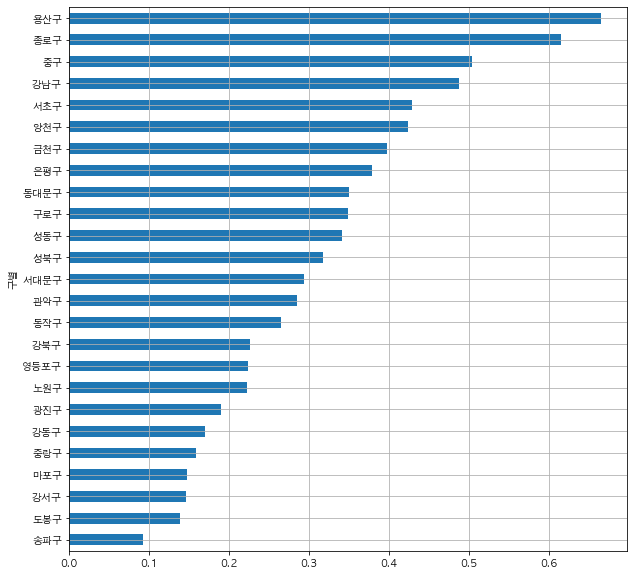

In [11]:
result["CCTV 비율"].sort_values().plot(kind='barh', grid=True, figsize=(10, 10))

plt.show()

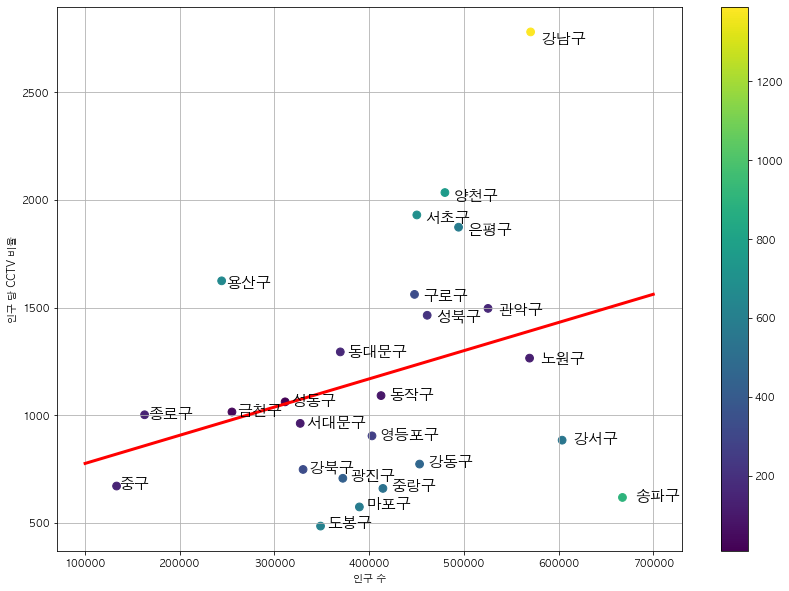

In [12]:
plt.figure(figsize=(14, 10))

plt.scatter(result['인구수'], result['소계'], c=bias, s=60)

x = np.linspace(100000, 700000, 100)

plt.plot(x, np_model(x), lw=3, color='r')

for row in result.itertuples():
    plt.text(row.인구수 * 1.02, row.소계 * 0.98, row.Index, fontsize=15)

plt.xlabel('인구 수')
plt.ylabel('인구 당 CCTV 비율')

plt.colorbar()
plt.grid()
plt.show()